In [ ]:
'''Keras Demo Notesbook. Also see: https://keras.io/examples/vision/mnist_convnet/'''

import numpy as np
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import figure

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# give some shape infos
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


60000 train samples
10000 test samples
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


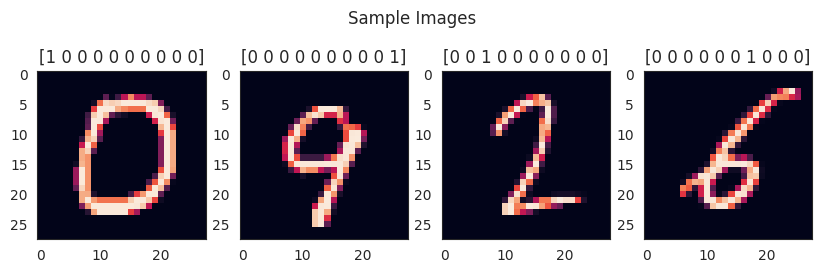

In [5]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]

# Print images and y_test values
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title(y_images[i].astype(int))

# Visualize images
plt.suptitle('Sample Images')
plt.show()

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print ("Model build done.")

Model build done.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

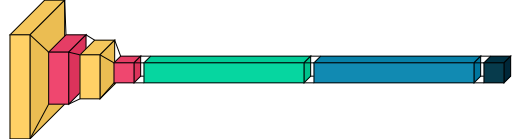

In [8]:
import visualkeras
model.summary()
# see: https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/
visualkeras.layered_view(model)


In [9]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2023-01-03 17:33:04.765481: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/3
422/422 [==============================] - 18s 39ms/step - loss: 0.3684 - accuracy: 0.8916 - val_loss: 0.0830 - val_accuracy: 0.9782
Epoch 2/3
422/422 [==============================] - 16s 38ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.0602 - val_accuracy: 0.9847
Epoch 3/3
422/422 [==============================] - 16s 38ms/step - loss: 0.0848 - accuracy: 0.9745 - val_loss: 0.0472 - val_accuracy: 0.9870


In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04528557136654854
Test accuracy: 0.9851999878883362


In [11]:
# Predict classes for Test-Images
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


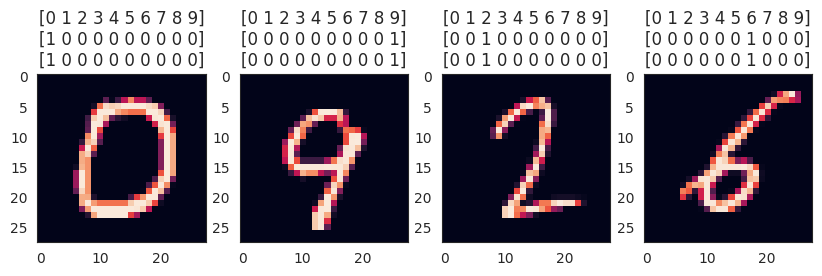

In [12]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4
y_images_pred=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]
    y_images_pred[idx]=y_pred[image_nr]

# Print images and y_test values
headline=np.arange(start=0, stop=10, step=1)

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title("{}\n{}\n{}".format(headline, y_images[i].astype(int),y_images_pred[i].round().astype(int)))

# Visualize images
plt.show()